# 自然語言處理與文字探勘技術：Term Weighting, Text Representation, and Vector Space Model
## 課程練習(week 05)

### 姓名（Name）：陳嬿伃
### 學號（Student ID）：o902108008

## 第一部分：教學及教材的實作

### 請就實體課程，線上教學，教材等提到的實作，依序於此實際動手寫程式並執行，就結果討論。

### Jieba + sklearn for TF-IDF (or you can use monpa + sklearn)

In [2]:
import jieba
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
jieba.set_dictionary("dict.txt.big")

corpus = []
with open("lyrics/告白氣球.txt", "rb") as f:
    for line in f:
        corpus.append(" ".join(jieba.cut(line, cut_all =False)))

#frequence martix
vectorizer = CountVectorizer()

# a[i][j]: indicate the frequence of term j at document i 
freq_martix = vectorizer.fit_transform(corpus)
transformer = TfidfTransformer()

#計算tf-idf
tfidf = transformer.fit_transform(freq_martix)

#get keyword
words = vectorizer.get_feature_names()

#TF-IDF矩陣
weight = tfidf.toarray()

#確認篇數&字詞數
print(tfidf.shape)

#計算每句的TF-IDF
keyword_index = np.squeeze(np.asarray(np.argmax(weight, axis = 1)))
for i in range(len(weight)):
    print("Keyword:{0}, weighting:{1}".format(words[keyword_index[i]],
                                             weight[i][keyword_index[i]]))

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.681 seconds.
Prefix dict has been built succesfully.


(34, 48)
Keyword:咖啡, weighting:0.5773502691896257
Keyword:一杯, weighting:0.7071067811865475
Keyword:唇印, weighting:0.7071067811865475
Keyword:名字, weighting:0.5
Keyword:告白, weighting:0.5
Keyword:天上飛, weighting:0.7071067811865475
Keyword:有點, weighting:0.7071067811865475
Keyword:只要, weighting:0.5
Keyword:一切, weighting:0.40824829046386296
Keyword:擁有, weighting:0.8944271909999159
Keyword:那天, weighting:0.6441124943562478
Keyword:甜蜜, weighting:0.7071067811865475
Keyword:任性, weighting:0.6110743788965829
Keyword:願意, weighting:1.0
Keyword:咖啡, weighting:0.5773502691896257
Keyword:一杯, weighting:0.7071067811865475
Keyword:唇印, weighting:0.7071067811865475
Keyword:名字, weighting:0.5
Keyword:告白, weighting:0.5
Keyword:天上飛, weighting:0.7071067811865475
Keyword:有點, weighting:0.7071067811865475
Keyword:只要, weighting:0.5
Keyword:一切, weighting:0.40824829046386296
Keyword:擁有, weighting:0.8944271909999159
Keyword:那天, weighting:0.6441124943562478
Keyword:甜蜜, weighting:0.7071067811865475
Keyword:任性, weighting:0.61

### Top 1 keyword of each sentence for a lyric

In [3]:
import jieba.analyse
jieba.set_dictionary("dict.txt.big")

with open("lyrics/告白氣球.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line, topK=1, withWeight=True)
        for tag, weight in tags:
            print(tag + "," + str(weight))

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.670 seconds.
Prefix dict has been built succesfully.


塞納河畔,3.9849225009666664
品嚐,5.97738375145
唇印,5.97738375145
花店,3.027229545675
告白,3.027229545675
天上飛,5.97738375145
有點,5.97738375145
禮物,2.988691875725
營造,1.9924612504833332
擁有,7.969845001933333
親愛,3.9849225009666664
輕易,5.97738375145
親愛,3.9849225009666664
願意,11.9547675029
塞納河畔,3.9849225009666664
品嚐,5.97738375145
唇印,5.97738375145
花店,3.027229545675
告白,3.027229545675
天上飛,5.97738375145
有點,5.97738375145
禮物,2.988691875725
營造,1.9924612504833332
擁有,7.969845001933333
親愛,3.9849225009666664
輕易,5.97738375145
親愛,3.9849225009666664
願意,11.9547675029
親愛,2.988691875725
飄香,5.97738375145
一整瓶,4.402510157133333
攪拌,5.97738375145
親愛,3.9849225009666664
願意,11.9547675029


### Top 10 keywords of each lyric in the collection 

In [4]:
from os import listdir
from os.path import join

files = listdir("lyrics")
for file in files:
    with open(join("lyrics", file),"rb") as f:
        tags = jieba.analyse.extract_tags(f.read(),10)
        print(file + ": " + ",".join(tags))

告白氣球.txt: 親愛,擁有,愛上你,願意,任性,花店,告白,塞納河畔,品嚐,唇印
手寫的從前.txt: 記得,輕刷,手寫,和弦,陽光,情人節,永遠,廣場,公園,校園
明明就.txt: 明明,守著,比較,溫柔,也許,抉擇,我會,自動,顏色,快樂
算什麼男人.txt: 什麼,男人,難過,起霧,眼睜睜,不聞不問,硬撐,拱手讓人,繼續,認份
聽爸爸的話.txt: 的話,受夠,比較,難道,孝順,藉口,應該,東西,送給,越走越遠
開不了口.txt: 沒有,難熬,煩惱,妳在,不了,能夠,遠遠,穿過,雲層,試著


### Generate the word Cloud of a lyric 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud

#產生文字雲
jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({"沒有","一個","什麼","那個"})

def generate_wordclound(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white",
                   max_words = 2000, stopwords = stopwords)
    #wc.generate(keywords)
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    keywords = {}
    with open(file_path,"r", encoding = 'utf8') as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=1, withWeight=True)
            for tag, weight in tags:
                keywords[tag] = weight
    return keywords

#關鍵字
keywords = get_keywords("lyrics/開不了口.txt",10)
print(keywords)

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.680 seconds.
Prefix dict has been built succesfully.


{'離開': 1.7078239289857142, '整個': 5.97738375145, '香香的': 1.7298454546714286, '快樂': 11.9547675029, '沒有': 4.78190700116, '穿過': 2.39095350058, '愛才': 2.988691875725, '不了': 2.01272681825, '呵護': 5.97738375145, '後悔': 3.9849225009666664, '安靜': 2.988691875725, '那麼': 2.39095350058, '詳盡': 1.9924612504833332, '整顆心': 2.988691875725, '這些': 2.39095350058, '總是': 5.97738375145, '能夠': 3.9849225009666664}


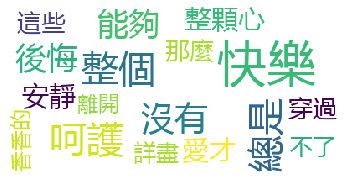

<Figure size 1000x600 with 0 Axes>

In [13]:
#產生文字雲，並儲存
generate_wordclound(keywords, stopwords,"lyrics/開不了口_wordclound.jpg")

### Generate the word cloud of the collection 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud

#產生文字雲
jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({"沒有","一個","什麼","那個"})

def generate_wordclound(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white",
                   max_words = 2000, stopwords = stopwords)
    wc.generate(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    with open(file_path,"r", encoding = 'utf8') as f:
        words = jieba.analyse.extract_tags(f.read(), topN)
    return " ".join(words)

from os import listdir
from os.path import join, splitext
def get_all_keywords(folder_path, topN):
    files = listdir("lyrics")
    all_keywords = []
    for file in files:
        if(splitext(join("lyrics", file))[-1] ==".txt"):
            all_keywords.append(get_keywords(join("lyrics", file), topN))
    return " ".join(all_keywords)

#關鍵字
keywords = get_all_keywords("lyrics",10)
print(keywords)

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.654 seconds.
Prefix dict has been built succesfully.


親愛 擁有 愛上你 願意 任性 花店 告白 塞納河畔 品嚐 唇印 記得 輕刷 手寫 和弦 陽光 情人節 永遠 廣場 公園 校園 明明 守著 比較 溫柔 也許 抉擇 我會 自動 顏色 快樂 什麼 男人 難過 起霧 眼睜睜 不聞不問 硬撐 拱手讓人 繼續 認份 的話 受夠 比較 難道 孝順 藉口 應該 東西 送給 越走越遠 沒有 難熬 煩惱 妳在 不了 能夠 遠遠 穿過 雲層 試著


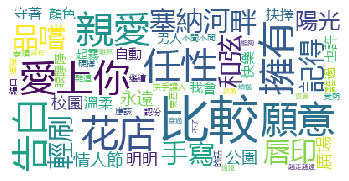

<Figure size 1000x600 with 0 Axes>

In [15]:
#產生文字雲，並儲存
generate_wordclound(keywords, stopwords,"lyrics/wordclound.jpg")

## 第二部分：綜合練習

### 前情提要：上次作業有請大家做出三部電影各自不重複詞語的次數，
```請編寫程式以爬蟲技術將 wikipedia『魔戒電影三部曲』的正體中文網頁爬回，並以程式擷取『劇情概要』該段落的文字，分別以『魔戒現身』『雙城奇謀』『王者再臨』段落分成 3 個文章。每個文章皆需各自獨立做斷詞，濾除 Stop Words 及標點符號後，計算各個不重複詞語在該屬文章中各出現幾次。
網址 >>> https://zh.wikipedia.org/wiki/魔戒電影三部曲```

**程式盡量寫完整，後續作業還有應用空間**

### 本次作業：
### 第一題：請大家依三部電影各自的前 100 個（Term Frequency 次數排序）不重複詞語做出文字雲（Wordcloud），一部電影一張文字雲圖，除了這裡要顯示圖，也要輸出PNG格式上傳 my2。

In [89]:
#定義文字雲
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud


jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({""})

def generate_wordclound(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white",
                   max_words = 2000, stopwords = stopwords)
    #wc.generate(keywords)
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    keywords = {}
    with open(file_path,"r", encoding = 'utf8') as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=100, withWeight=True)
            for tag, weight in tags:
                keywords[tag] = weight
    return keywords



In [90]:
#魔戒現身
#關鍵字
keywords1 = get_keywords("魔戒介紹/魔戒現身.txt",100)
print(keywords1)


Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.681 seconds.
Prefix dict has been built succesfully.


{'魔戒': 0.7991817801165606, '佛羅多': 0.4187975876812101, '甘道夫': 0.34265257173917196, '至尊': 0.27922341120248406, '索倫': 0.22843504782611462, '趕往': 0.19036253985509552, '他們': 0.19036253985509552, '亞拉': 0.19036253985509552, '波羅': 0.19036253985509552, '比爾': 0.15229003188407642, '薩魯曼': 0.15229003188407642, '皮聘': 0.15229003188407642, '遠征隊': 0.15229003188407642, '梅里': 0.13713609472611463, '精靈': 0.11421752391305731, '哈比人': 0.11421752391305731, '於是': 0.11421752391305731, '戒靈': 0.11421752391305731, '襲擊': 0.11421752391305731, '強獸': 0.11421752391305731, '夥伴': 0.08853934810191083, '瑞文': 0.08853934810191083, '凱蘭': 0.07614501594203821, '組成': 0.07614501594203821, '埃西鐸': 0.07614501594203821, '半獸人': 0.07614501594203821, '咕嚕': 0.07614501594203821, '帶同': 0.07614501594203821, '奪取': 0.07614501594203821, '布理': 0.07614501594203821, '行客': 0.07614501594203821, '戴爾': 0.07614501594203821, '亞玟': 0.07614501594203821, '勒苟': 0.07614501594203821, '金靂': 0.07614501594203821, '剛鐸': 0.07614501594203821, '礦坑': 0.07614501594203

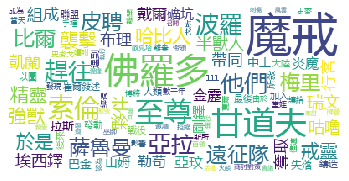

<Figure size 1000x600 with 0 Axes>

In [91]:
#產生文字雲，並儲存
generate_wordclound(keywords1, stopwords,"魔戒介紹/result/wordclound_魔戒現身_100keyword.png")

In [92]:
#雙城奇謀
#關鍵字
keywords2 = get_keywords("魔戒介紹/雙城奇謀.txt",100)
print(keywords2)

{'佛羅多': 0.3856376613838709, '薩魯曼': 0.2892282460379032, '他們': 0.2249553024739247, '洛汗': 0.2249553024739247, '亞拉': 0.2249553024739247, '山姆': 0.21824367718548388, '皮聘': 0.19281883069193545, '甘道夫': 0.16068235890994623, '法貢': 0.16068235890994623, '樹鬍': 0.16068235890994623, '梅里': 0.14469332575268817, '咕嚕': 0.12854588712795698, '葛力': 0.12854588712795698, '決定': 0.12854588712795698, '盔谷': 0.12854588712795698, '剛鐸': 0.12854588712795698, '樹人': 0.12854588712795698, '魔戒': 0.10651234251129033, '森林': 0.10220899973483871, '於是': 0.09640941534596772, '強獸': 0.09640941534596772, '大軍': 0.09640941534596772, '希優頓': 0.09640941534596772, '驅逐': 0.09640941534596772, '伊歐墨': 0.09640941534596772, '抵達': 0.09640941534596772, '發現': 0.09640941534596772, '帶到': 0.09640941534596772, '拉斯': 0.07963972549387097, '法拉': 0.07949698696887096, '一支': 0.06555735858537634, '炎魔': 0.06427294356397849, '墜落': 0.06427294356397849, '襲擊': 0.06427294356397849, '引領': 0.06427294356397849, '魔多': 0.06427294356397849, '橫過': 0.06427294356397849, 

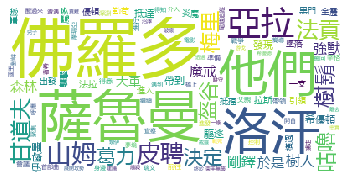

<Figure size 1000x600 with 0 Axes>

In [93]:
#產生文字雲，並儲存
generate_wordclound(keywords2, stopwords,"魔戒介紹/result/wordclound_雙城奇謀_100keyword.png")

In [94]:
#王者再臨
keywords3 = get_keywords("魔戒介紹/王者再臨.txt",100)
print(keywords3)

{'佛羅多': 0.4143766898752166, '魔戒': 0.2517900089868284, '亞拉': 0.24862601392512995, '山姆': 0.24120816413864815, '甘道夫': 0.22790717943136912, '皮聘': 0.18646951044384746, '魔多': 0.18646951044384746, '咕嚕': 0.1450318414563258, '力斯': 0.1450318414563258, '斯提': 0.12431300696256498, '他們': 0.10359417246880415, '索倫': 0.10359417246880415, '剛鐸': 0.10359417246880415, '安格': 0.10359417246880415, '軍隊': 0.10359417246880415, '大軍': 0.10359417246880415, '守軍': 0.10359417246880415, '法拉': 0.0854213724795494, '希優頓': 0.08287533797504332, '屍羅': 0.08287533797504332, '迪耐瑟': 0.08287533797504332, '巫王': 0.08287533797504332, '奧斯吉力': 0.08287533797504332, '亞斯': 0.08287533797504332, '梅里': 0.07462865466897746, '開始': 0.06215650348128249, '哈比人': 0.06215650348128249, '殺死': 0.06215650348128249, '晶球': 0.06215650348128249, '昂哥': 0.06215650348128249, '波羅': 0.06215650348128249, '重創': 0.06215650348128249, '愛隆': 0.06215650348128249, '伊歐玟': 0.06215650348128249, '半獸人': 0.06215650348128249, '抵達': 0.06215650348128249, '末日': 0.061313219040762

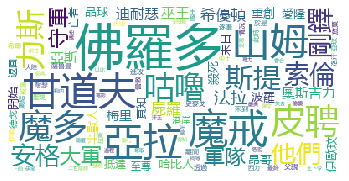

<Figure size 1000x600 with 0 Axes>

In [95]:
#產生文字雲，並儲存
generate_wordclound(keywords3, stopwords,"魔戒介紹/result/wordclound_王者再臨_100keyword.png")

### 第二題：請大家將三部電影的詞語綜合起來計算，取前 100 個（Term Frequency 次數排序）不重複詞語做出一張文字雲（Wordcloud），除了這裡要顯示圖，也要輸出PNG格式上傳 my2。

In [117]:
#方法1:沒有印出tf
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud

#產生文字雲
jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({""})

def generate_wordclound(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white",
                   max_words = 2000, stopwords = stopwords)
    wc.generate(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    with open(file_path,"r", encoding = 'utf8') as f:
        words = jieba.analyse.extract_tags(f.read(), topN)
    return " ".join(words)

from os import listdir
from os.path import join, splitext
def get_all_keywords(folder_path, topN):
    files = listdir("魔戒介紹")
    all_keywords = []
    for file in files:
        if(splitext(join("魔戒介紹", file))[-1] ==".txt"):
            all_keywords.append(get_keywords(join("魔戒介紹", file), topN))
    return " ".join(all_keywords)

#關鍵字
keywords = get_all_keywords("魔戒介紹",100)
print(keywords)

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.683 seconds.
Prefix dict has been built succesfully.


佛羅多 魔戒 亞拉 山姆 甘道夫 皮聘 魔多 咕嚕 力斯 斯提 他們 索倫 剛鐸 安格 軍隊 大軍 守軍 法拉 希優頓 屍羅 迪耐瑟 巫王 奧斯吉力 亞斯 梅里 開始 哈比人 殺死 晶球 昂哥 波羅 重創 愛隆 伊歐玟 半獸人 抵達 末日 真知 亡者 至尊 返回 港岸 德戈 史麥戈 來到 薩魯曼 逐漸 離間 透過 進攻 於是 亞玟 父親 希爾 聖劍 悲傷 耐瑟 情況 洛汗 戒靈 營救 放棄 作戰 此時 集結 國王 西力 最終 大陸 火山 中土 拉斯 二世 上前 瑞文 王下令 汗王 得知 前往 以此 失去 電影 講述 發現 過程 奪取 從此 隱匿 現在 岡等 會合 葛力 偷襲 塔底 袍內 伊多 舉行 慶典 陰謀 呈現 佛羅多 薩魯曼 他們 洛汗 亞拉 山姆 皮聘 甘道夫 法貢 樹鬍 梅里 咕嚕 葛力 決定 盔谷 剛鐸 樹人 魔戒 森林 於是 強獸 大軍 希優頓 驅逐 伊歐墨 抵達 發現 帶到 拉斯 法拉 一支 炎魔 墜落 襲擊 引領 魔多 橫過 勒苟 金靂 優頓 黑門 進入 抵擋 出發 軍隊 父親 準備 會議 戰爭 帶領 進行 得悉 前往 辛格 控制 聚集 瑞文 得知 介入 查察 遭遇 遇到 電影 開首 呼應 首部曲 摩瑞亞 橋上 對峙 深淵 夢境 醒過來 繼續 奪回 嚮導 擄走 進發 尾隨追蹤 國王 身邊 著希 展開攻勢 燒殺 破壞 兒子 希優德 戰死 甥伊 責難 忠實 離去 沼澤 戒靈 游戈 終於 駐守 束手無策 建議 透過 一條 魔戒 佛羅多 甘道夫 至尊 索倫 趕往 他們 亞拉 波羅 比爾 薩魯曼 皮聘 遠征隊 梅里 精靈 哈比人 於是 戒靈 襲擊 強獸 夥伴 瑞文 凱蘭 組成 埃西鐸 半獸人 咕嚕 帶同 奪取 布理 行客 戴爾 亞玟 勒苟 金靂 剛鐸 礦坑 炎魔 山姆 巴金 中土 拉斯 失落 遇到 加入 崔爾敍述 鑄造 以圖 大陸 人類 聯盟 發動 最後 戰役 後來 所殺 數千年 史麥 戈所 影響 史麥戈 成為 手裡 離棄 斯所 111 當天 博將 讓給 堂姪 經過 發現 由於 囑咐 儘速 離開 夏爾 巫師 首領 商討對策 認為 無從 邀請 陣營 拒絕 散克塔 帶領 風雲 刺傷 親愛 愛隆 召開 會議 商討 摧毀 丟進 火燄 自願 執行 這個


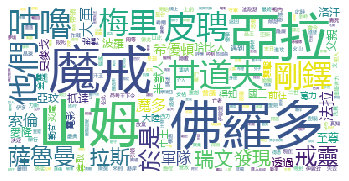

<Figure size 1000x600 with 0 Axes>

In [115]:
#產生文字雲，並儲存
generate_wordclound(keywords, stopwords,"魔戒介紹/result/wordclound_魔戒三部曲_100keyword.png")

In [118]:
#方法2:印出tf
#定義文字雲
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud


jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({""})

def generate_wordclound(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white",
                   max_words = 2000, stopwords = stopwords)
    #wc.generate(keywords)
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    keywords = {}
    with open(file_path,"r", encoding = 'utf8') as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=100, withWeight=True)
            for tag, weight in tags:
                keywords[tag] = weight
    return keywords

In [119]:
keywords4 = get_keywords("魔戒介紹/魔戒三部曲.txt",100)
print(keywords4)

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.670 seconds.
Prefix dict has been built succesfully.


{'魔戒': 0.2517900089868284, '佛羅多': 0.4143766898752166, '甘道夫': 0.22790717943136912, '至尊': 0.05065057834637781, '索倫': 0.10359417246880415, '趕往': 0.19036253985509552, '他們': 0.10359417246880415, '亞拉': 0.24862601392512995, '波羅': 0.06215650348128249, '比爾': 0.15229003188407642, '薩魯曼': 0.04143766898752166, '皮聘': 0.18646951044384746, '遠征隊': 0.15229003188407642, '梅里': 0.07462865466897746, '精靈': 0.11421752391305731, '哈比人': 0.06215650348128249, '於是': 0.04143766898752166, '戒靈': 0.04143766898752166, '襲擊': 0.06427294356397849, '強獸': 0.09640941534596772, '夥伴': 0.08853934810191083, '瑞文': 0.024091295757365686, '凱蘭': 0.07614501594203821, '組成': 0.07614501594203821, '埃西鐸': 0.07614501594203821, '半獸人': 0.06215650348128249, '咕嚕': 0.1450318414563258, '帶同': 0.07614501594203821, '奪取': 0.02071883449376083, '布理': 0.07614501594203821, '行客': 0.07614501594203821, '戴爾': 0.07614501594203821, '亞玟': 0.04143766898752166, '勒苟': 0.06427294356397849, '金靂': 0.06427294356397849, '剛鐸': 0.10359417246880415, '礦坑': 0.07614501594203

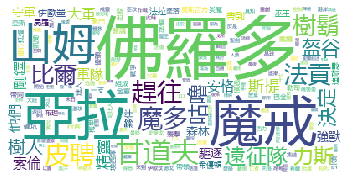

<Figure size 1000x600 with 0 Axes>

In [120]:
#產生文字雲，並儲存
generate_wordclound(keywords4, stopwords,"魔戒介紹/result/wordclound_魔戒三部曲_2_100keyword.png")

### 第三題：將第一題三個電影各自的所有不重複詞(local)及第二題綜合所有不重複詞(global)的詞頻（Term Frequency）都輸出成 txt 格式檔。（共 4 個檔）
txt 檔格式參考：每一列顯示一個詞及其詞頻，中間以,（半形逗號）隔開。譬如

```
比爾博,5
魔戒,4
...
```

In [103]:
#魔戒現身
#將結果存成txt檔
file = open('魔戒介紹/result/魔戒現身_100keyword.txt', 'w', encoding="utf-8") 
file.write("Term"+' '+"TF_IDF"+'\n')
for k,v in keywords1.items():
        file.write(str(k)+','+str(v)+'\n')
file.close()

In [104]:
#雙城奇謀
#將結果存成txt檔
file = open('魔戒介紹/result/雙城奇謀_100keyword.txt', 'w', encoding="utf-8") 
file.write("Term"+' '+"TF_IDF"+'\n')
for k,v in keywords2.items():
        file.write(str(k)+','+str(v)+'\n')
file.close()

In [105]:
#王者再臨
#將結果存成txt檔
file = open('魔戒介紹/result/王者再臨_100keyword.txt', 'w', encoding="utf-8") 
file.write("Term"+' '+"TF_IDF"+'\n')
for k,v in keywords3.items():
        file.write(str(k)+','+str(v)+'\n')
file.close()

In [121]:
#魔戒三部曲
#將結果存成txt檔
file = open('魔戒介紹/result/魔戒三部曲_100keyword.txt', 'w', encoding="utf-8") 
file.write("Term"+' '+"TF_IDF"+'\n')
for k,v in keywords4.items():
        file.write(str(k)+','+str(v)+'\n')
file.close()

### 加分題（+5 points）：將第二題的文字雲，顏色限用粉紅色系，嵌入圖檔 1280px-Tloftr-logo.png 內，也就是將文字雲塞入圖檔內『THE LORD OF THE RINGS』圖形或是自己找一張與魔戒相關的圖檔完成本題亦可。除了這裡要顯示圖，也要輸出PNG格式上傳 my2。

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import colors


jieba.set_dictionary("dict.txt.big")
stopwords = {}.fromkeys({""})

def generate_wordclound(keywords, stopwords, file_path):
    import imageio
    color_list=['#FF0088','#FF44AA','#FF88C2','#FFB7DD']#建立顏色模組(pink看調色盤)
    colormap=colors.ListedColormap(color_list)#建立色調
    back_color = imageio.imread('魔戒介紹/Tloftr-logo.png')
    wc = WordCloud(font_path = "msyh.ttf", background_color = "white", mask=back_color, colormap=colormap,
                   max_words = 2000, stopwords = stopwords)

    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi=100)
    plt.show()
    wc.to_file(file_path)
    
def get_keywords(file_path, topN):
    keywords = {}
    with open(file_path,"r", encoding = 'utf8') as f:
        for line in f:
            tags = jieba.analyse.extract_tags(line, topK=100, withWeight=True)
            for tag, weight in tags:
                keywords[tag] = weight
    return keywords

In [21]:
keywords4 = get_keywords("魔戒介紹/魔戒三部曲.txt",100)
print(keywords4)

Building prefix dict from C:\Users\user\Documents\NLP\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uc5f8887b7773ed7f6d29cd451694702b.cache
Loading model cost 0.685 seconds.
Prefix dict has been built succesfully.


{'魔戒': 0.2517900089868284, '佛羅多': 0.4143766898752166, '甘道夫': 0.22790717943136912, '至尊': 0.05065057834637781, '索倫': 0.10359417246880415, '趕往': 0.19036253985509552, '他們': 0.10359417246880415, '亞拉': 0.24862601392512995, '波羅': 0.06215650348128249, '比爾': 0.15229003188407642, '薩魯曼': 0.04143766898752166, '皮聘': 0.18646951044384746, '遠征隊': 0.15229003188407642, '梅里': 0.07462865466897746, '精靈': 0.11421752391305731, '哈比人': 0.06215650348128249, '於是': 0.04143766898752166, '戒靈': 0.04143766898752166, '襲擊': 0.06427294356397849, '強獸': 0.09640941534596772, '夥伴': 0.08853934810191083, '瑞文': 0.024091295757365686, '凱蘭': 0.07614501594203821, '組成': 0.07614501594203821, '埃西鐸': 0.07614501594203821, '半獸人': 0.06215650348128249, '咕嚕': 0.1450318414563258, '帶同': 0.07614501594203821, '奪取': 0.02071883449376083, '布理': 0.07614501594203821, '行客': 0.07614501594203821, '戴爾': 0.07614501594203821, '亞玟': 0.04143766898752166, '勒苟': 0.06427294356397849, '金靂': 0.06427294356397849, '剛鐸': 0.10359417246880415, '礦坑': 0.07614501594203

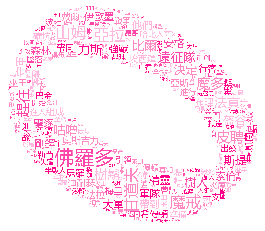

<Figure size 1000x600 with 0 Axes>

In [22]:
#產生文字雲，並儲存
generate_wordclound(keywords4, stopwords,"魔戒介紹/result/wordclound_魔戒三部曲_pink_100keyword.png")

小結論：
1. tf-idf值會戒於0~1之間，其結果帶入模型預測較好
2. tf-idf可以抓出比較關鍵的字詞且不易重複
3. 從魔戒的例子可以看出結果還不錯，主要角色都在前幾名關鍵詞